In [26]:
# Step 1: Import and Clean data

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.decomposition import PCA

In [28]:
df = pd.read_csv("Country-data.csv", sep = ",")

In [29]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [30]:
df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [31]:
names = df[["country"]]
X = df.drop(["country"], axis = 1)

In [32]:
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

In [33]:
# Step 2: Run a PCA Algorithm to get 2 Principle Components for the 9 X features

In [34]:
pca = PCA(n_components=2)
scaled_pca = pca.fit_transform(X_scaled)

In [12]:
# Step 3: Plot a Scatter plot of the PCs on the axis

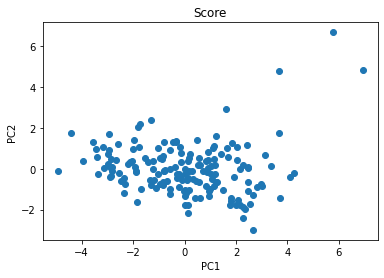

In [35]:
plt.scatter(scaled_pca[:, 0], scaled_pca[:, 1])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Score")
plt.show()

In [36]:
# Step 4: Rank the features in order of importance according to PCA

In [38]:
# As demonstrated in class

loadings = pca.components_

In [39]:
loadings

array([[-0.41951945,  0.28389698,  0.15083782,  0.16148244,  0.39844111,
        -0.19317293,  0.42583938, -0.40372896,  0.39264482],
       [ 0.19288394,  0.61316349, -0.24308678,  0.67182064,  0.02253553,
        -0.00840447, -0.22270674,  0.15523311, -0.0460224 ]])

In [40]:
feature_importance = pd.DataFrame(np.sum(loadings**2, axis =0), index = df.columns[1:], columns = ['Importance'])
feature_importance.sort_values(by = "Importance" ,ascending = False )

,Importance
imports,0.477420
exports,0.456567
life_expec,0.230937
child_mort,0.213201
total_fer,0.187094
income,0.159263
gdpp,0.156288
health,0.081843
inflation,0.037386


In [42]:
# Step 5: Plot a heatmap of the feature importance (Fill in all parameters)

In [17]:
feature_names = df.columns[1:]

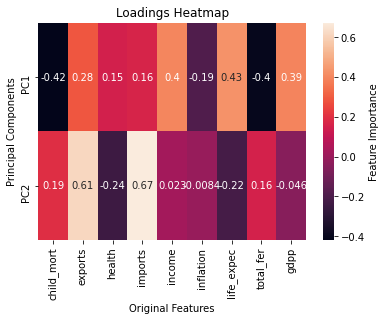

In [47]:
sns.heatmap(loadings, annot=True, xticklabels=feature_names, yticklabels=["PC1","PC2" ], cbar_kws={'label':'Feature Importance'})

plt.xlabel('Original Features')
plt.ylabel('Principal Components')
plt.title('Loadings Heatmap')
plt.show()

In [48]:
# Step 6: Plot a correlation plot of the original features. What do you notice between the graphs of 4 & 5?

[]

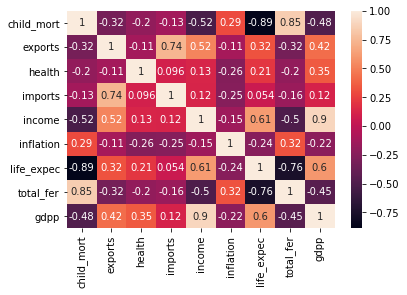

In [49]:
sns.heatmap(X.corr(), annot=True)
plt.plot()

Imports and exports are important for PCA1. This is similar to the feature importance up above.

In [50]:
# Step 7: Run a PCA with 9 PCs. Plot a Cumulative Explained Variance Plot. 
# How many PCs should we use if we want to retain 95% of the variance?

In [51]:
pca = PCA(n_components=9)
X_pca = pca.fit_transform(X_scaled)

In [52]:
pca.explained_variance_ratio_

array([0.4595174 , 0.17181626, 0.13004259, 0.11053162, 0.07340211,
       0.02484235, 0.0126043 , 0.00981282, 0.00743056])

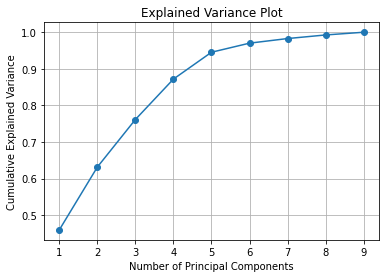

In [54]:
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

plt.plot(np.arange(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance Plot')
plt.grid()
plt.show()

Use 6 PCA to maintain 9% efficiency

In [55]:
# Thank you!